In [1]:

import pandas as pd

from helper_functions import *
from keys import *


# # bit clunky in a notebook
# from tkinter import filedialog
# stdFilePath = "data/survey"
# selectedFile = filedialog.askopenfilename(initialdir=stdFilePath,
#                                           title="Select file",
#                                           filetypes=(("Only logs", "*.csv"),
#                                                      ("all files", "*.*")))
# if selectedFile == "":
#     exit("[ERR] Please select a file")

# selectedFile = "data/example.csv"
selectedFile = "data/survey/tempsurvey.csv"

df = pd.read_csv(selectedFile,
                 encoding="utf-16",
                 skiprows=range(1, 2),
                 header=0
                 )

# print(df.head())
# print(df.dtypes)
# print(df.columns)
# print(df.describe())


# Survey

## Short Stress State

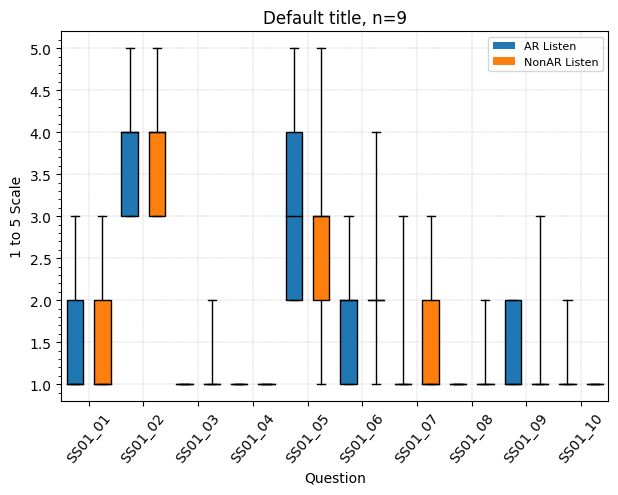

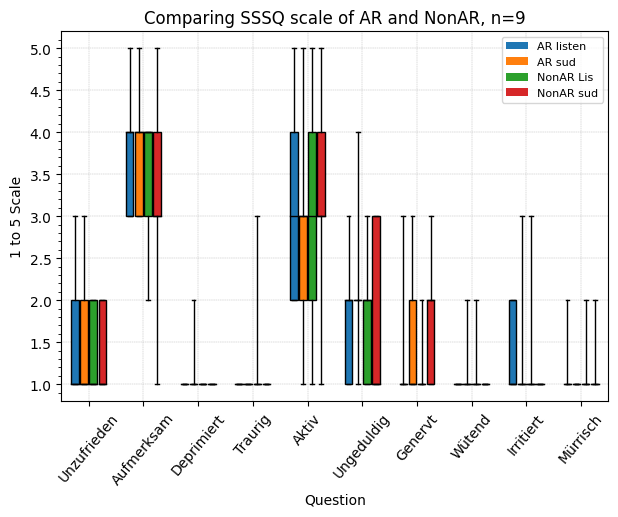

In [2]:
groupedBoxPlots([df[SSSQ.Scale.AR.Listen_Keys], df[SSSQ.Scale.NonAR.Listen_Keys]], 
                ["AR Listen ", "NonAR Listen"])

groupedBoxPlots(
    [df[SSSQ.Scale.AR.Listen_Keys], 
     df[SSSQ.Scale.NonAR.Listen_Keys],
     df[SSSQ.Scale.AR.Sudoku_Keys], 
     df[SSSQ.Scale.NonAR.Sudoku_Keys]],
     ["AR listen", "AR sud", "NonAR Lis", "NonAR sud"],
     labels=SSSQ.Scale.Names,
     title="Comparing SSSQ scale of AR and NonAR",
     width=0.55,
     colours = TABLEAU_COLORS
)


# makeBoxPlot(df[SSSQ.Scale.AR.Listen_Keys], SSSQ.Scale.Names, "SSSQ nach AR listen")
# makeBoxPlot(df[SSSQ.Scale.NonAR.Listen_Keys], SSSQ.Scale.Names, "SSSQ nach Non-AR listen")
# makeBoxPlot(df["DD01_01"], ["Alter"], "Demographie Übersicht")


## Short User Experience Questionaire

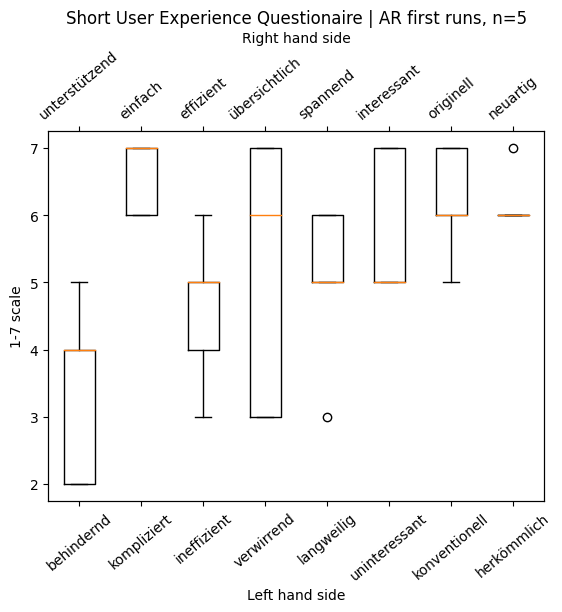

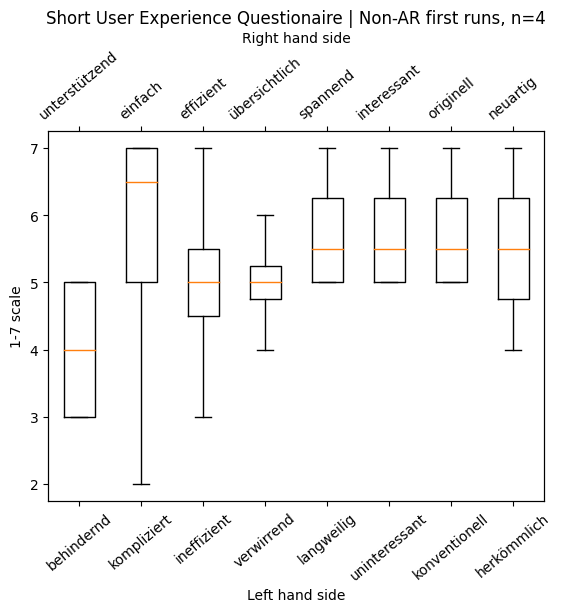

In [3]:
dualAxisUeqBoxplot(df.loc[(df["QUESTNNR"]=="ArFirst")][ShortUserExpQ.Keys], "AR first runs")
dualAxisUeqBoxplot(df.loc[(df["QUESTNNR"]=="NonArFirst")][ShortUserExpQ.Keys], "Non-AR first runs")


## Emotionsskala

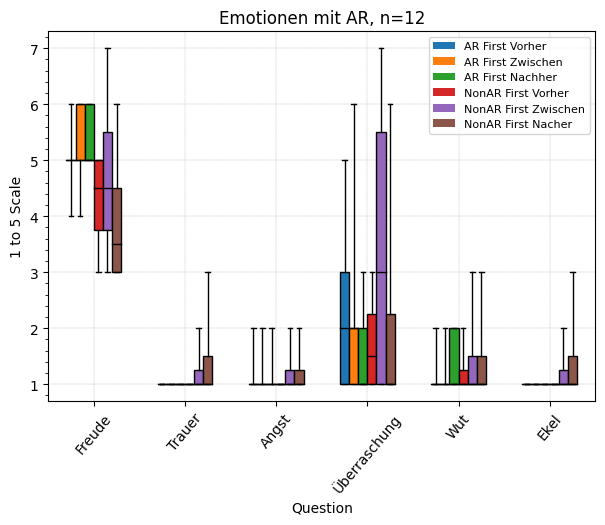

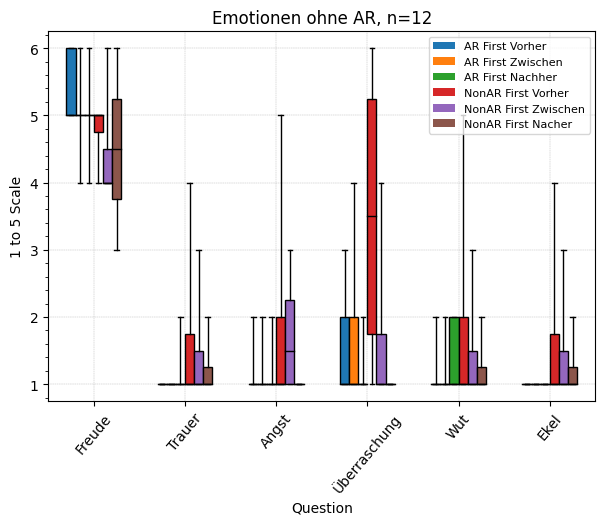

In [4]:
groupedBoxPlots(
    [
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.AR.Vorher],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.AR.Zwischen],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.AR.Nachher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.AR.Vorher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.AR.Zwischen],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.AR.Nachher],
    ],
    [
        "AR First Vorher",
        "AR First Zwischen",
        "AR First Nachher",
        "NonAR First Vorher",
        "NonAR First Zwischen",
        "NonAR First Nacher",
    ],
    labels=EmotionScales.Names,
    title="Emotionen mit AR", n=12
)
groupedBoxPlots(
    [
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.NonAR.Vorher],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.NonAR.Zwischen],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.NonAR.Nachher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.NonAR.Vorher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.NonAR.Zwischen],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.NonAR.Nachher],
    ],
    [
        "AR First Vorher",
        "AR First Zwischen",
        "AR First Nachher",
        "NonAR First Vorher",
        "NonAR First Zwischen",
        "NonAR First Nacher",
    ],
    labels=EmotionScales.Names,
    title="Emotionen ohne AR",
    n=12
)

## Abschließende Fragen

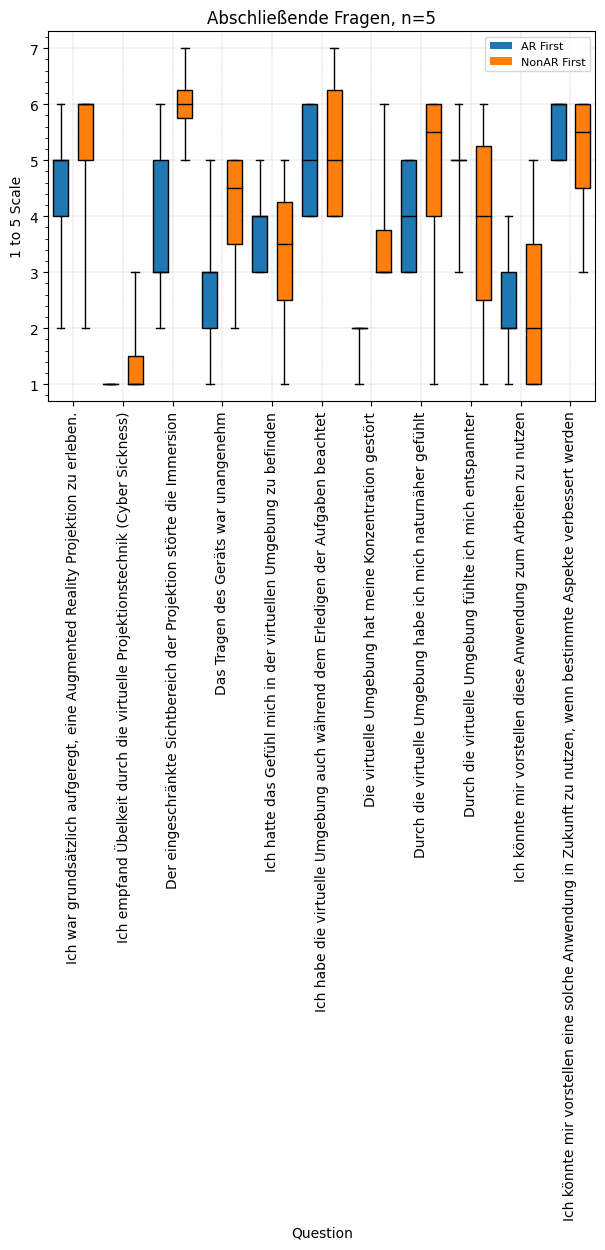

In [5]:
groupedBoxPlots(
    [df.loc[(df["QUESTNNR"]=="ArFirst")][AbschließendeFragen.Keys],
     df.loc[(df["QUESTNNR"]=="NonArFirst")][AbschließendeFragen.Keys]],
    ["AR First", "NonAR First"],
    title="Abschließende Fragen",
    labels=AbschließendeFragen.Names,
    rot=90,
)

# Headtracking

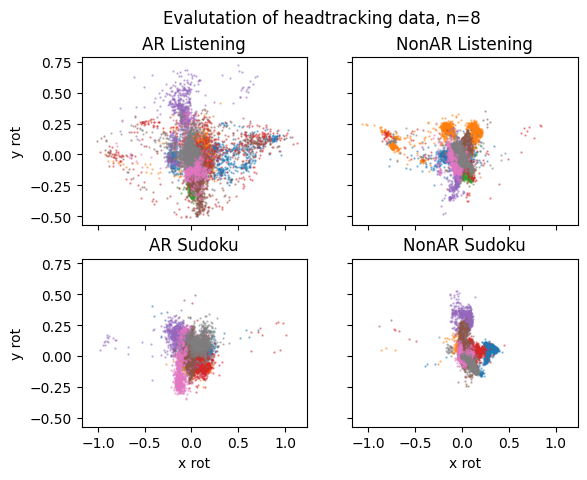

In [12]:
import glob

import matplotlib.pyplot as plt
import pandas as pd

headtracking_files = glob.glob("data/headtracking/*.csv")
headtracking_dfs = (pd.read_csv(file) for file in headtracking_files)


fig, axs = plt.subplots(2, 2)

for i in headtracking_dfs:
    alpha = 0.5
    size = 0.4
    x_axis = "rotX"
    y_axis = "rotY"
    calibrationWindow = 5

    # Get the selected headtracking rows for each task permutation
    arlisten = i.loc[   (i["ARorNonAR"]=="AR")    & (i["Tasktype"]=="Listening")][[x_axis, y_axis]]
    nonarlisten = i.loc[(i["ARorNonAR"]=="NonAR") & (i["Tasktype"]=="Listening")][[x_axis, y_axis]]
    arsudoku = i.loc[   (i["ARorNonAR"]=="AR")    & (i["Tasktype"]=="Sudoku")][[x_axis, y_axis]]
    nonarsudoku = i.loc[(i["ARorNonAR"]=="NonAR") & (i["Tasktype"]=="Sudoku")][[x_axis, y_axis]]

    datasets = [arlisten, nonarlisten, arsudoku, nonarsudoku]
    titles = ["AR Listening", "NonAR Listening", "AR Sudoku", "NonAR Sudoku"]

    # Normalise to center of screen
    for j, ax in enumerate(axs.flat):
        ax.set_title(titles[j])
        datasets[j] -= datasets[j].iloc[0:calibrationWindow].sum() / calibrationWindow
        ax.scatter(datasets[j][x_axis], datasets[j][y_axis], alpha=alpha, s=size)
        

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set(xlabel='x rot', ylabel='y rot')
    ax.label_outer()
    # use shared or custom below
    ax.sharex(axs[0,0])
    ax.sharey(axs[0,0])

# Custom axis sizes
# Xlim = (-1.5, 1.5)
# Ylim = (-0.4, 0.75)
# plt.setp(axs, xlim=Xlim, ylim=Ylim)

title="Evalutation of headtracking data, n=" + str(len(headtracking_files))
fig.suptitle(title)
# plt.tight_layout()
# plt.savefig(title, dpi=500)
plt.show()

# Hautleitfähigkeit

In [152]:
import json
import glob
import os
from datetime import datetime
import datetime as dt

import pandas as pd

head_files_all = glob.glob("data/headtracking/*.csv")
head_dfs = (pd.read_csv(file) for file in headtracking_files)

sweat_path = "data/sweat/"
sweat_files_csv = glob.glob(sweat_path + "*.json")

for file in sweat_files_csv:
    with open(file, encoding='utf-8') as f:
        user_id = os.path.basename(file)[:4]
        corresponding_head_file = [i for i in head_files_all if os.path.basename(i)[:4].startswith(user_id)][0]
        corrensponding_day = os.path.basename(corresponding_head_file)[5:15]
        day = pd.to_datetime(corrensponding_day, dayfirst=True)

        sweat_df = pd.json_normalize(json.loads(f.read())["Items"])
        sweat_time = pd.to_datetime(sweat_df['time'],  format='%H:%M:%S:%f')
        sweat_df["datetime"] = sweat_time + pd.DateOffset(year=day.year, month=day.month, day=day.day)
        sweat_df["Timestamp"] = sweat_df["datetime"][0].timestamp()
        
        filepath = sweat_path + os.path.basename(file)[:4] + "-sweat.csv"
        sweat_df.to_csv(filepath, index=False, encoding='utf-8')


C:\Users\brube\AppData\Local\Temp\ipykernel_12412\824060078.py:24: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  sweat_df["datetime"] = sweat_time + pd.DateOffset(year=day.year, month=day.month, day=day.day)
C:\Users\brube\AppData\Local\Temp\ipykernel_12412\824060078.py:24: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  sweat_df["datetime"] = sweat_time + pd.DateOffset(year=day.year, month=day.month, day=day.day)
C:\Users\brube\AppData\Local\Temp\ipykernel_12412\824060078.py:24: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  sweat_df["datetime"] = sweat_time + pd.DateOffset(year=day.year, month=day.month, day=day.day)


['data/sweat\\2109-sweat.csv']
['data/headtracking\\1707 31-05-2023 13-48-27.csv', 'data/headtracking\\2004 24-05-2023 14-40-24.csv', 'data/headtracking\\2109 05-06-2023 10-14-35.csv', 'data/headtracking\\2705 31-05-2023 13-08-24.csv', 'data/headtracking\\6666 24-05-2023 13-59-01.csv', 'data/headtracking\\7473 31-05-2023 14-32-29.csv', 'data/headtracking\\9999 30-05-2023 15-12-11.csv', 'data/headtracking\\KSK1 25-05-2023 13-23-45.csv', 'data/headtracking\\qwer 24-05-2023 16-10-29.csv.broken']
Empty DataFrame
Columns: [Timestamp, Userkey, TimeStr, ARorNonAR, Tasktype, rotX, rotY, rotZ, posX, posY, posZ, time, ONEEdata, datetime]
Index: []
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4928    NaN
4929    NaN
4930    NaN
4931    NaN
4932    NaN
Name: ONEEdata, Length: 4933, dtype: object


[]

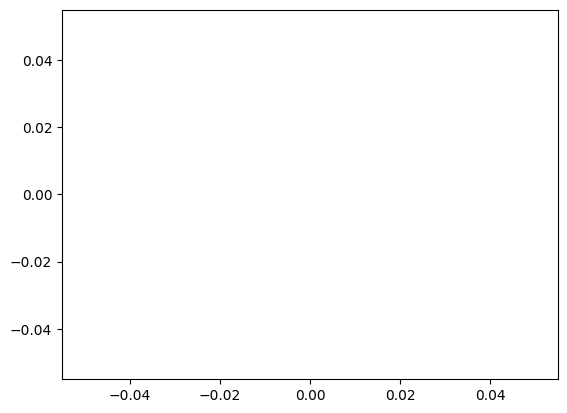

In [203]:
import json
import glob
import os

import pandas as pd
import matplotlib.pyplot as plt


head_files_all = sorted(glob.glob("data/headtracking/*.csv*"))
head_dfs = (pd.read_csv(file) for file in head_files_all)


sweat_files_csv = sorted(glob.glob("data/sweat/*.csv"))
sweat_dfs = (pd.read_csv(file) for file in sweat_files_csv)

print(sweat_files_csv)
print(head_files_all)

mdfs = []

for sweat_df, head_df in zip(sweat_dfs, head_dfs):
    # print("[NEW PAIR]")
    # print(sweat_df["datetime"], head_df["TimeStr"])
    
    merged = pd.merge_asof(
        left=head_df, 
        right=sweat_df, 
        on="Timestamp", 
        direction='nearest',
        tolerance=2
        # tolerance=pd.Timedelta('1 second')
        )                       
    mdfs.append(merged)
    print(merged.loc[merged["ONEEdata"].notnull()])
 
    # print(merged.columns)
    merged.to_csv("data/temp/test.csv", index=False, encoding='utf-8')



print(mdfs[0]["ONEEdata"])
plt.plot(
    data=mdfs[0]["ONEEdata"]
)
